# Lending club case study

## Introduction
Here we are going to anylyse coustomer's data from a bank and profile the coustomers weathere lending money to coustomer is a risky or a safe investment.
## Risk assement
* If the bank rejects loan to the coustomers who are likely to repay, Bank might loose business.
* If the bank lends loan to the coustomers who are not likely to repay, Bank might have financial loss.

## Discisions
* Loan rejected - No transaction with the bank any further.
* Loan accepted
    - Fully paid on time
    - Cuurent Loan has not metured yet, coustomer is paying all the payements on time.
    - Defaulted, coustomer has failed to make payment on time.

In [1]:
#Load the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.plotting.backend = "plotly"

In [2]:
#Read the data and explore it
loan = pd.read_csv("loan.csv")
loan.head()

/Users/rabia/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
# Explore the shape of the data, we have 111 columns and almost 40k entries
loan.shape

(39717, 111)

## Data Cleaning
Table is very big with lot of coloums before going any further we need to start cleaning up the data.

Lets Make sure we have unique id for every entry. We have 39717 unique Id for 39717 entry. OK !

In [4]:
loan.id.nunique()

39717

In [5]:
#Review the summary statistics for the numeric columns
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


The following rows will be deleted because we do not need it in our analysis:
<br>
<br>**desc** : There is a lot of describition and we have tens of thousands different descriptions.
<br>**emp_title** : two many unique values and it is going very hard to get insights out of it (28,820 unique values).
<br>**initial_list_status** : All values equal "f", this column will not give any insight.
<br>**member_id** : We already have "id" column is unique identifier, we do not want another unique identifer.
<br>**next_pymnt_d** : We do not think the date of the next payment will have any value in this analysis.
<br>**policy_code** : All values equal "1", this column will not give any insight.
<br>**pymnt_plan** : All values equal "n", this column will not give any insight.
<br>**tax_liens** : All values equal "0" or missing value, this column will not give any insight.
<br>**url** : We do not think "url" can give any insight and we already have unique identifier column "Id".
<br>**application_type** : All values equal "INDIVIDUAL", this column will not give any insight.

In [6]:
#Drop the useless columns
coloumn_drop_list = ["desc", "emp_title", "initial_list_status", "member_id", "next_pymnt_d", "policy_code", 
                     "pymnt_plan", "tax_liens", "url", "application_type"]
loan.drop(coloumn_drop_list, inplace=True, axis=1)
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


Filter out all the columns which all values are missing. These columns will provide no insight  since it has no values

In [7]:
#create a list of columns with all values are missing
NA_columns = list(loan.columns[loan.isna().all()])

In [8]:
# Delete all the NA Columns
loan.drop(NA_columns, inplace=True, axis=1)
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,...,0.00,0.00,Jan-15,171.62,May-16,0.0,0,0.0,0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,...,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0,0.0,0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,...,0.00,0.00,Jun-14,649.91,May-16,0.0,0,0.0,0,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,...,0.00,0.00,Jan-15,357.48,Apr-16,0.0,0,0.0,0,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,...,0.00,0.00,May-16,67.79,May-16,0.0,0,0.0,0,0.0


We have identified an embeded space at the begaining of "term" column and we are deleting it using the following code

In [9]:
loan.term = loan.term.str.lstrip()

Convert the type of the columns "int_rate" and "revol_util" from string to float

In [10]:
loan.int_rate = loan.int_rate.str.rstrip('%').astype('float')
loan.revol_util = loan.revol_util.str.rstrip('%').astype('float')

Convert they type of "earliest_cr_line", "last_pymnt_d", "last_credit_pull_d" from strung to Datetime

In [11]:
loan.earliest_cr_line = pd.to_datetime(loan.earliest_cr_line, format='%b-%y')
loan.last_pymnt_d = pd.to_datetime(loan.last_pymnt_d, format='%b-%y')
loan.last_credit_pull_d = pd.to_datetime(loan.last_credit_pull_d, format='%b-%y')

Exclude any columns with all values equal to Zero

In [12]:
#Filter the data to exclude any column with all values equal to Zero
loan = loan.loc[:, (loan != 0).any(axis=0)]

In [13]:
loan.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies
count,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,39661.0,39020.000000
mean,6.831319e+05,11219.443815,10947.713196,10397.448868,12.021177,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,0.0,0.043260
std,2.106941e+05,7456.670694,7187.238670,7128.450439,3.724825,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.0,0.204324
min,5.473400e+04,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,5.162210e+05,5500.000000,5400.000000,5000.000000,9.250000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,0.0,0.000000
50%,6.656650e+05,10000.000000,9600.000000,8975.000000,11.860000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.0,0.0,0.000000
75%,8.377550e+05,15000.000000,15000.000000,14400.000000,14.590000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.0,0.0,0.000000
max,1.077501e+06,35000.000000,35000.000000,35000.000000,24.590000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,0.0,2.000000


These 2 columns have a mix of Zeros and missing values, we are deleting them too

In [14]:
Del_columns = ['chargeoff_within_12_mths', 'collections_12_mths_ex_med']
loan.drop(Del_columns, inplace=True, axis=1)
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,...,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,...,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,...,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0


## Missing Values
<br>
<br> First we have to look for columns with any missing values

In [15]:
#explore the information about all columns in the dataframe
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       39717 non-null  int64         
 1   loan_amnt                39717 non-null  int64         
 2   funded_amnt              39717 non-null  int64         
 3   funded_amnt_inv          39717 non-null  float64       
 4   term                     39717 non-null  object        
 5   int_rate                 39717 non-null  float64       
 6   installment              39717 non-null  float64       
 7   grade                    39717 non-null  object        
 8   sub_grade                39717 non-null  object        
 9   emp_length               38642 non-null  object        
 10  home_ownership           39717 non-null  object        
 11  annual_inc               39717 non-null  float64       
 12  verification_status      39717 n

In [16]:
# List of the columns with any missing values
missing_columns = loan.columns[loan.isnull().any()]
missing_columns

Index(['emp_length', 'title', 'mths_since_last_delinq',
       'mths_since_last_record', 'revol_util', 'last_pymnt_d',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [17]:
#Check the percentage of missing value for each column
(loan.isnull().sum() * 100 / len(loan)).sort_values(ascending=False)

mths_since_last_record     92.985372
mths_since_last_delinq     64.662487
emp_length                  2.706650
pub_rec_bankruptcies        1.754916
last_pymnt_d                0.178765
revol_util                  0.125891
title                       0.027696
last_credit_pull_d          0.005036
out_prncp                   0.000000
open_acc                    0.000000
pub_rec                     0.000000
revol_bal                   0.000000
total_acc                   0.000000
out_prncp_inv               0.000000
collection_recovery_fee     0.000000
total_pymnt                 0.000000
total_rec_prncp             0.000000
last_pymnt_amnt             0.000000
total_rec_int               0.000000
total_rec_late_fee          0.000000
recoveries                  0.000000
total_pymnt_inv             0.000000
id                          0.000000
inq_last_6mths              0.000000
loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
t

**mths_since_last_record** : This column has a significant high missing values, We think dropping it from the analysis will be more benificial than keeping it

In [18]:
loan.drop('mths_since_last_record', inplace=True, axis=1)

**mths_since_last_delinq** : This column has a high missing values percentage (~65%) But wew think imputing the missing values with Zero could be useful. We have noticed as the code shows beloew that all missing values are associated with zero value for "delinq_2yrs" column which mean no delinquecy occured in the last 2 years. This means it no delinq occured or it was longer than 2 years. We will imopute it with Zero but We will be careful dealing with it and come up with conclusions.

In [19]:
loan[loan['mths_since_last_delinq'].isnull()]['delinq_2yrs'].unique()

array([0])

In [20]:
loan.mths_since_last_delinq = loan.mths_since_last_delinq.fillna(0)

**emp_length
<br>pub_rec_bankruptcies
<br>last_pymnt_d
<br>revol_util
<br>title
<br>last_credit_pull_d**
<br>
<br>These columns has a low missing values percentage (0.005 - 2.7%). These columns are not good to imopute with mean or mode. It is better to remove the rows with missing values from these columns and we will lose only 2.7% of the data

In [21]:
#Removing any rows with missing values
loan = loan.dropna()

Now we have a dataframe with No missing values contains 37,825 rows

In [22]:
#information of the dataframe columns after dealing with missing values
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37825 entries, 0 to 39680
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       37825 non-null  int64         
 1   loan_amnt                37825 non-null  int64         
 2   funded_amnt              37825 non-null  int64         
 3   funded_amnt_inv          37825 non-null  float64       
 4   term                     37825 non-null  object        
 5   int_rate                 37825 non-null  float64       
 6   installment              37825 non-null  float64       
 7   grade                    37825 non-null  object        
 8   sub_grade                37825 non-null  object        
 9   emp_length               37825 non-null  object        
 10  home_ownership           37825 non-null  object        
 11  annual_inc               37825 non-null  float64       
 12  verification_status      37825 n

## Outliers

In [23]:
#Careate a list of numeric columns
numeric_columns = loan.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'pub_rec_bankruptcies'],
      dtype='object')

Drop column **"id"** since it will be used as a refference and not for analysis so we do not need to think about outliers for this column

In [24]:
numeric_columns = numeric_columns.drop(['id', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'pub_rec_bankruptcies'])

In [25]:
numeric_columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'mths_since_last_delinq',
       'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt'],
      dtype='object')

In [26]:
#Create a dataframe of numeric columns only for the purpose of isolating them from the categorical variables
loan_n = loan[numeric_columns]

In [27]:
#Create a table showing all numeric columns with important statistics and the upper and lower limits of the data.
Q1 = loan_n.quantile(0.25)
Q3 = loan_n.quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

mean = loan_n.mean()
median = loan_n.quantile(0.5)
maximum = loan_n.max()
minimum = loan_n.min()

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.concat([upper_limit, lower_limit, mean, median, maximum, minimum], axis=1, keys=['upper_limit', 
                                                                                         'lower_limit', 
                                                                                         'mean', 'median', 
                                                                                         'maximum', 'minimum'])

,upper_limit,lower_limit,mean,median,maximum,minimum
loan_amnt,29100.00,-8500.00,11328.78,10000.00,35000.00,500.00
funded_amnt,29250.00,-8750.00,11050.90,10000.00,35000.00,500.00
funded_amnt_inv,29021.77,-9413.06,10618.93,9200.00,35000.00,0.00
int_rate,22.54,1.39,12.07,11.86,24.59,5.42
installment,833.76,-230.27,327.16,283.20,1305.19,16.08
annual_inc,145900.00,-20500.00,69675.60,60000.00,6000000.00,4000.00
dti,34.17,-7.27,13.38,13.47,29.99,0.00
mths_since_last_delinq,52.50,-31.50,12.70,0.00,120.00,0.00
open_acc,21.00,-3.00,9.33,9.00,44.00,2.00
revol_bal,37277.00,-16299.00,13482.27,8979.00,149588.00,0.00


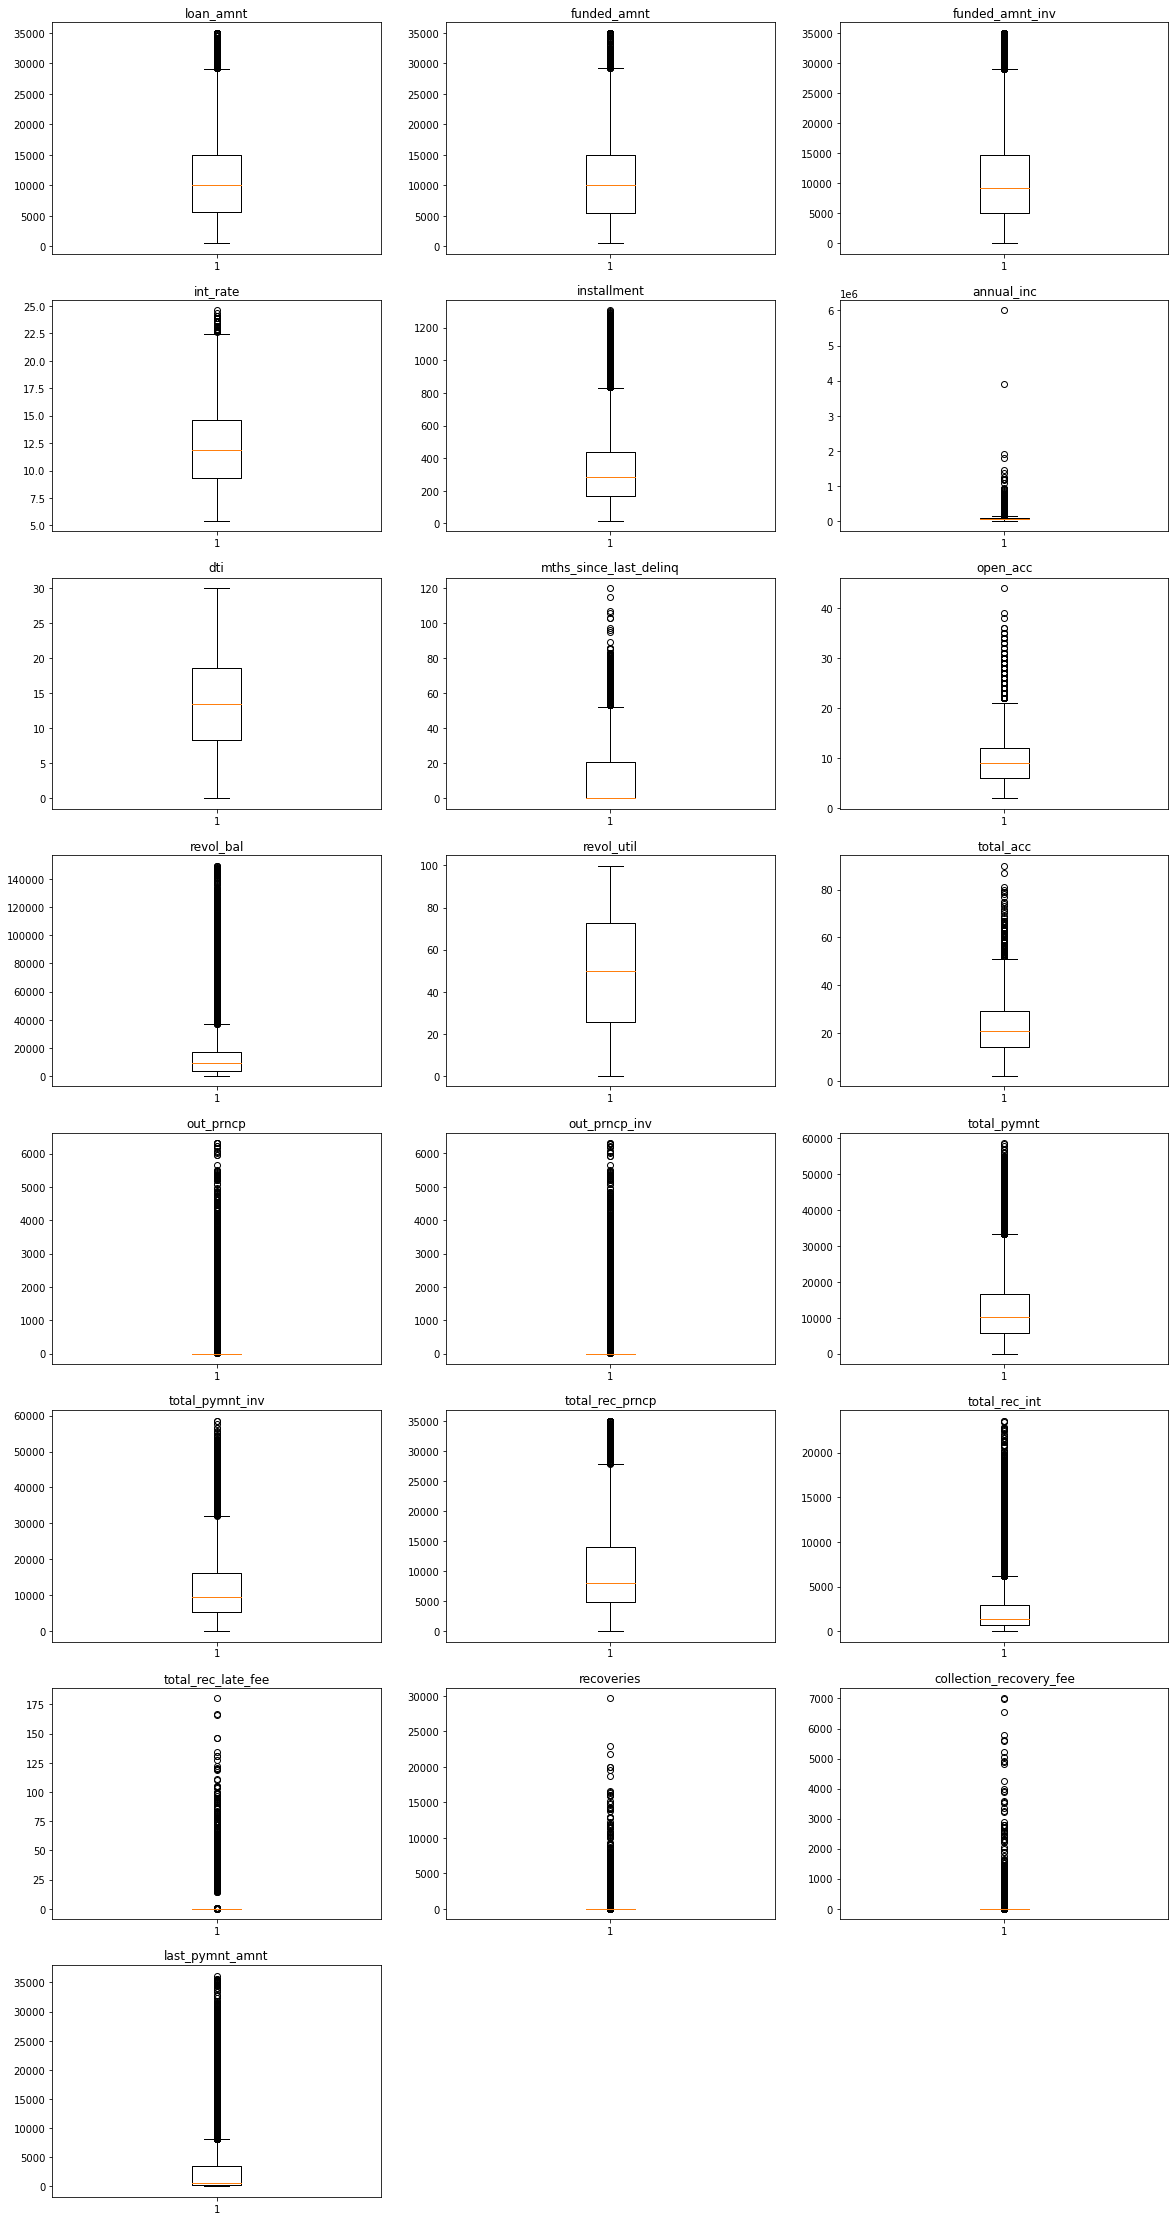

In [28]:
#Visulize the columns and outliers using box plot
plt.figure(figsize = (20,40))
for i in range(0, len(numeric_columns)):
    plt.subplot(8,3,i+1)
    plt.boxplot(loan_n[numeric_columns[i]])
    plt.title(numeric_columns[i])

## Univariant analysis
Start to analyzie each coloum and see which are relevent. Initally steps
1. Check if the data in coloums is valid.
2. Check if there is any missing data and/or invalid data.
3. Check if there are any outliars and if outliars are needed for paticular column
4. Analyze if the coloum has any corelation with current loan status

### Loan Amount

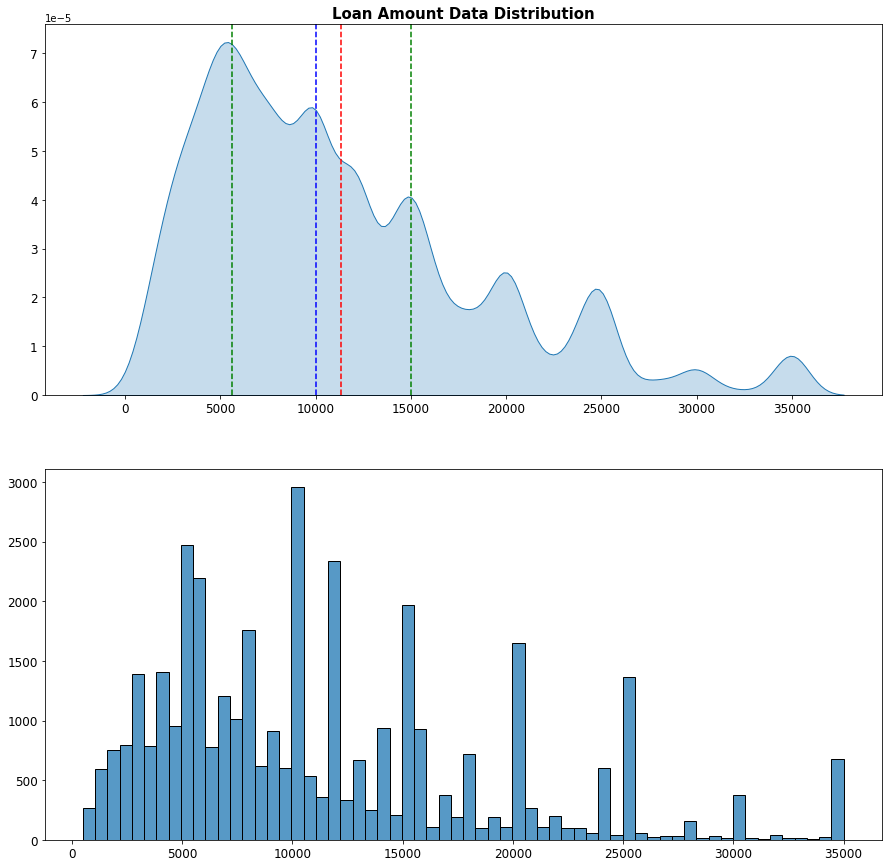

In [31]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.kdeplot(data = loan, x ='loan_amnt', fill = bool).set(xlabel = None, ylabel = None)
plt.axvline(x=loan.loan_amnt.mean(), color='red', linestyle = 'dashed')
plt.axvline(x=loan.loan_amnt.median(), color='blue', linestyle = 'dashed')
plt.axvline(x=loan.loan_amnt.quantile(0.25), color='green', linestyle = 'dashed')
plt.axvline(x=loan.loan_amnt.quantile(0.75), color='green', linestyle = 'dashed')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Loan Amount Data Distribution", fontsize = 15, fontweight = 'bold')

plt.subplot(2,1,2)
sns.histplot(data=loan, x="loan_amnt").set(xlabel = None, ylabel = None)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Term

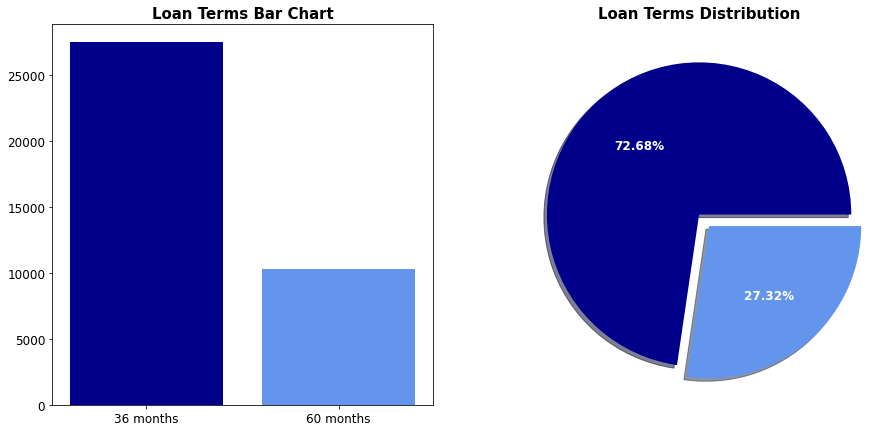

In [32]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.bar(loan.groupby("term")["term"].count().index, 
        loan.groupby("term")["term"].count(), 
        color=["darkblue", "cornflowerblue"])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Loan Terms Bar Chart", fontsize = 15, fontweight = 'bold')

plt.subplot(1,2,2)
size = loan['term'].value_counts().tolist()
colors = ["darkblue", "cornflowerblue"]
labels = ['36 Months', '60 Months']
explode = [0, 0.1]

plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%',
       textprops={'color': 'w', 'fontsize' : 12, 'fontweight' : 'bold'})
plt.title('Loan Terms Distribution', fontsize = 15, fontweight = 'bold')
plt.axis('off')
plt.show()

### Interest Rate

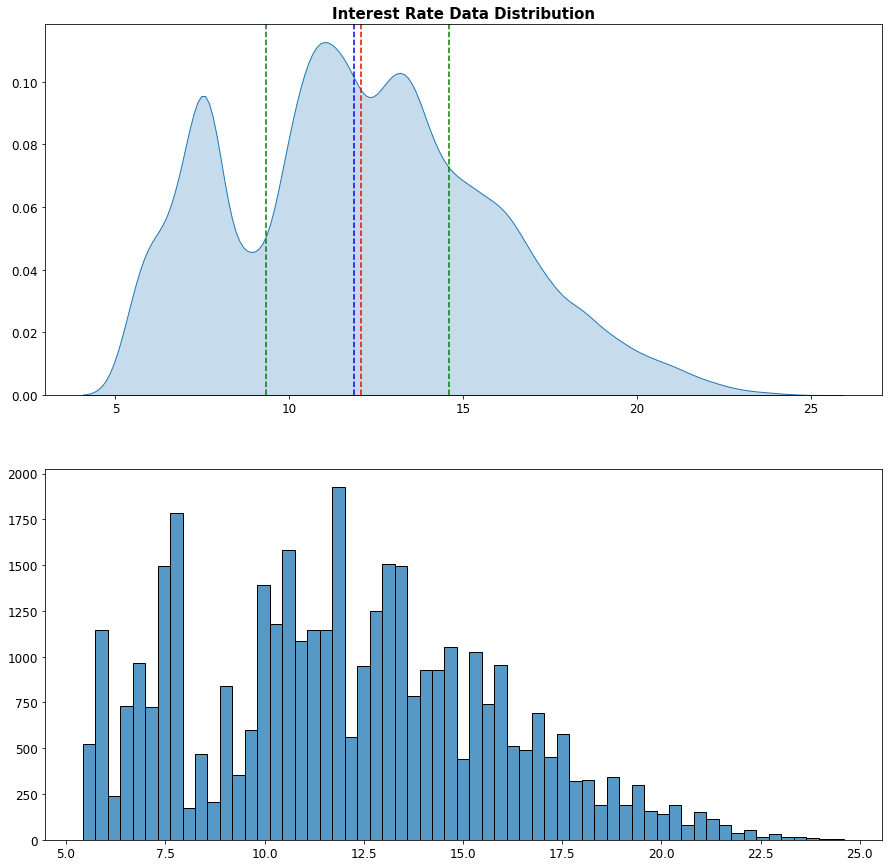

In [34]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.kdeplot(data = loan, x ='int_rate', fill = bool).set(xlabel = None, ylabel = None)
plt.axvline(x=loan.int_rate.mean(), color='red', linestyle = 'dashed')
plt.axvline(x=loan.int_rate.median(), color='blue', linestyle = 'dashed')
plt.axvline(x=loan.int_rate.quantile(0.25), color='green', linestyle = 'dashed')
plt.axvline(x=loan.int_rate.quantile(0.75), color='green', linestyle = 'dashed')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Interest Rate Data Distribution", fontsize = 15, fontweight = 'bold')

plt.subplot(2,1,2)
sns.histplot(data=loan, x="int_rate").set(xlabel = None, ylabel = None)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Installment

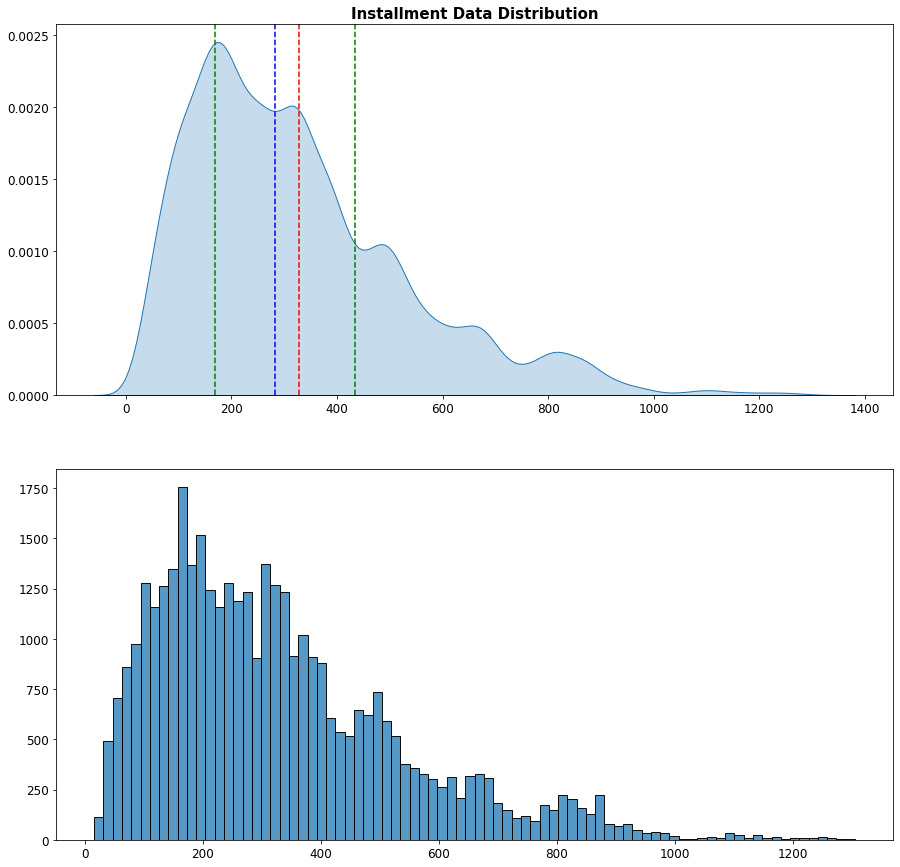

In [35]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.kdeplot(data = loan, x ='installment', fill = bool).set(xlabel = None, ylabel = None)
plt.axvline(x=loan.installment.mean(), color='red', linestyle = 'dashed')
plt.axvline(x=loan.installment.median(), color='blue', linestyle = 'dashed')
plt.axvline(x=loan.installment.quantile(0.25), color='green', linestyle = 'dashed')
plt.axvline(x=loan.installment.quantile(0.75), color='green', linestyle = 'dashed')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Installment Data Distribution", fontsize = 15, fontweight = 'bold')

plt.subplot(2,1,2)
sns.histplot(data=loan, x="installment").set(xlabel = None, ylabel = None)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Loan Grade & Sub Grade

In [ ]:
loan.grade.value_counts()

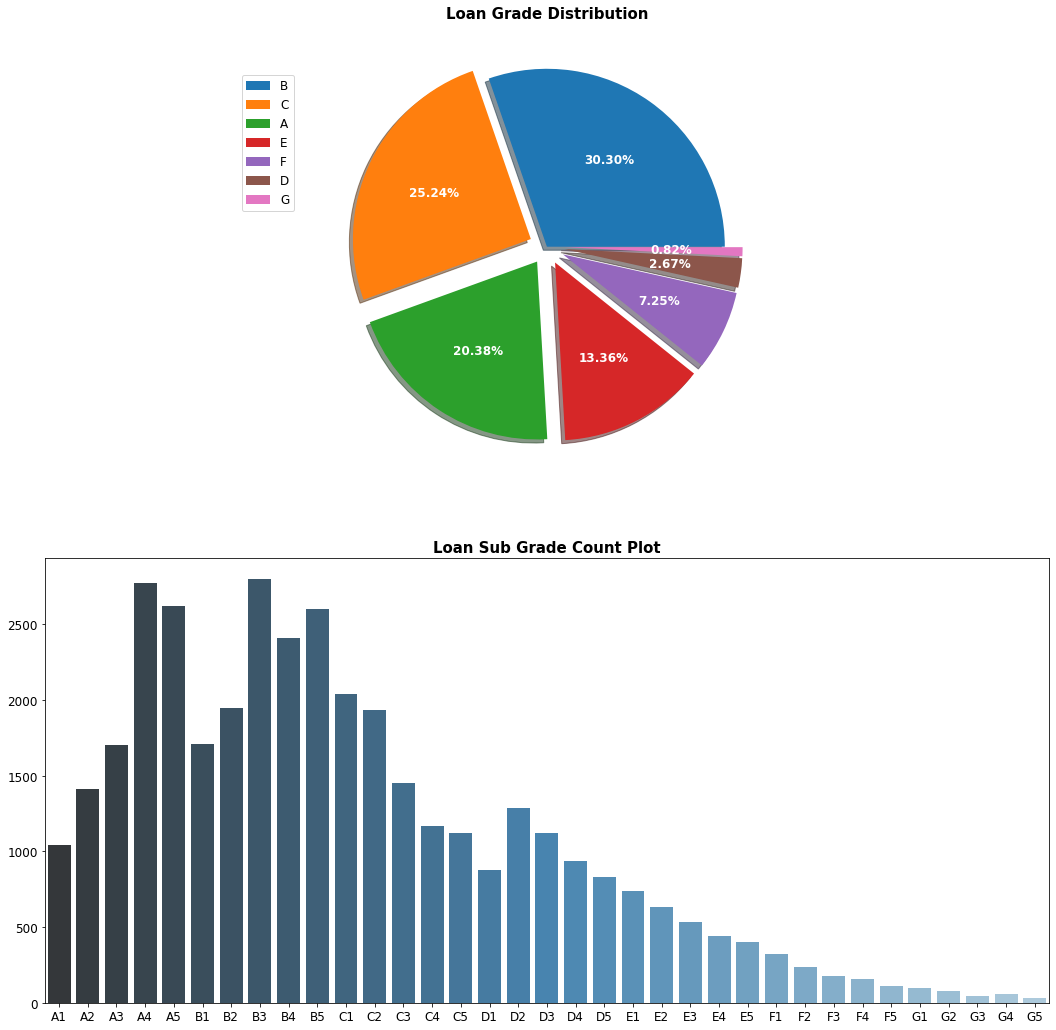

In [36]:
plt.figure(figsize=(18,18))

plt.subplot(2,1,1)
size = loan['grade'].value_counts().tolist()
labels = loan.grade.unique().tolist()
explode = [0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
plt.pie(size, explode = explode, shadow = True, autopct = '%.2f%%',
       textprops={'color': 'w', 'fontsize' : 12, 'fontweight' : 'bold'})
plt.title('Loan Grade Distribution', fontsize = 15, fontweight = 'bold')
plt.legend(labels, bbox_to_anchor=(-0.2,0.9), prop={'size': 12}, loc="upper left")
plt.axis('off')

plt.subplot(2,1,2)
order = loan['sub_grade'].unique().tolist()
order.sort()
palette = sns.color_palette("Blues_d", n_colors=35)
palette.reverse()
sns.countplot(x = 'sub_grade', data = loan, order = order, palette = palette).set(xlabel = None, ylabel = None)
plt.title('Loan Sub Grade Count Plot', fontweight="bold", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize=12)
plt.show()

More than 75% of the loans are grades A to C with A is almost represent third of the loans

### Employment Lenght

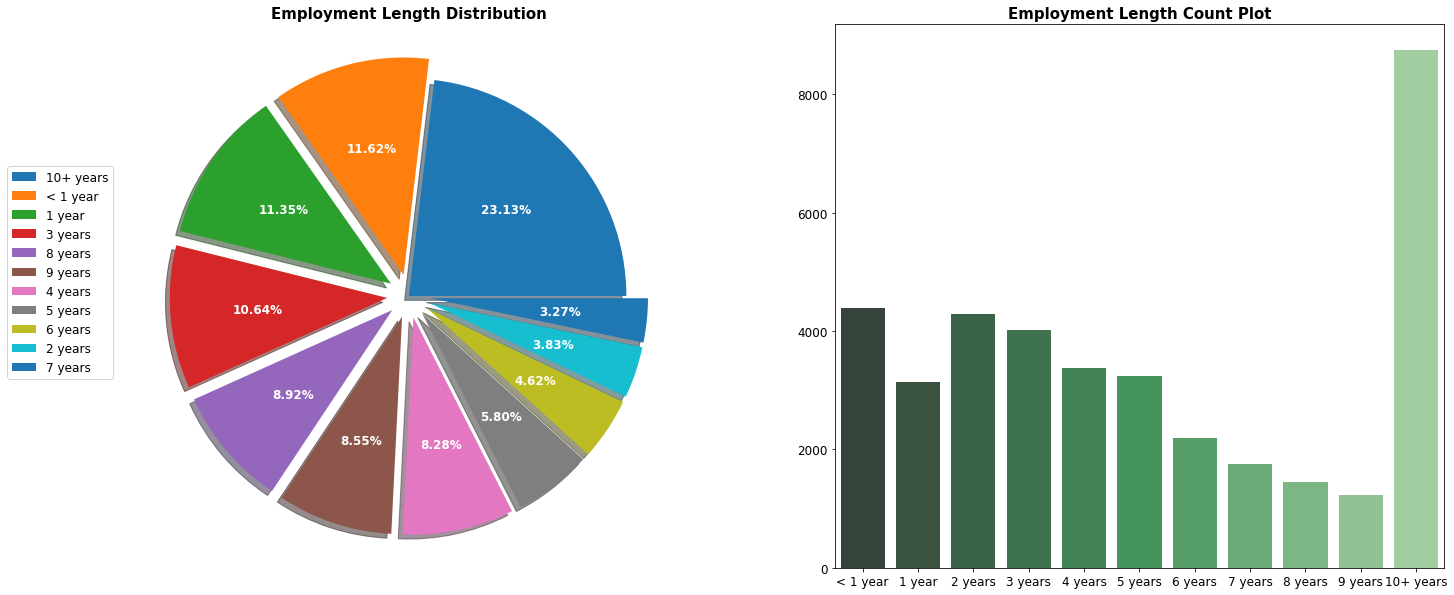

In [39]:
plt.figure(figsize=(24,10))

plt.subplot(1,2,1)
size = loan['emp_length'].value_counts().tolist()
labels = loan.emp_length.unique().tolist()
explode = [0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
plt.pie(size, explode = explode, shadow = True, autopct = '%.2f%%',
       textprops={'color': 'w', 'fontsize' : 12, 'fontweight' : 'bold'})
plt.title('Employment Length Distribution', fontsize = 15, fontweight = 'bold')
plt.legend(labels, bbox_to_anchor=(-0.25,0.75), prop={'size': 12}, loc="upper left")
plt.axis('off')

plt.subplot(1,2,2)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', 
         '9 years', '10+ years']

palette = sns.color_palette("Greens_d", n_colors=11)
palette.reverse()
sns.countplot(x = 'emp_length', data = loan, order = order, palette = palette).set(xlabel = None, ylabel = None)
plt.title('Employment Length Count Plot', fontweight="bold", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

### Home Ownership

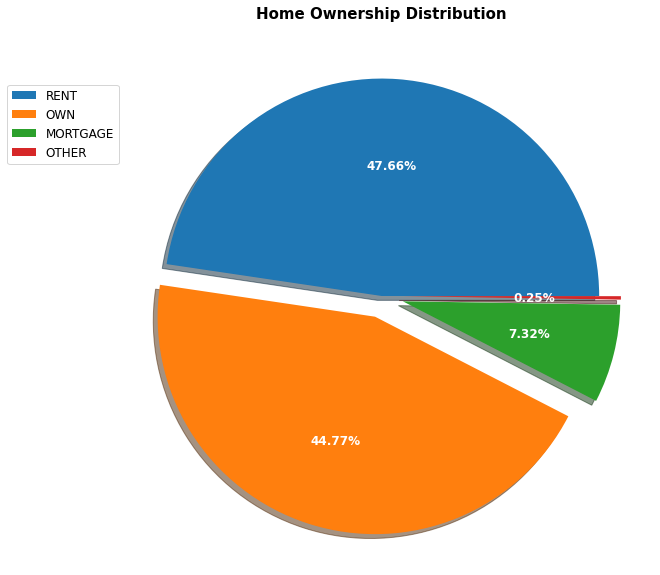

In [45]:
plt.figure(figsize=(15,10))

size = loan['home_ownership'].value_counts().tolist()
labels = loan['home_ownership'].unique().tolist()
explode = [0, 0.1, 0.1, 0.1]
plt.pie(size, explode = explode, shadow = True, autopct = '%.2f%%',
       textprops={'color': 'w', 'fontsize' : 12, 'fontweight' : 'bold'})
plt.title('Home Ownership Distribution', fontsize = 15, fontweight = 'bold')
plt.legend(labels, bbox_to_anchor=(-0.2,0.9), prop={'size': 12}, loc="upper left")
plt.axis('off')
plt.show()

### Annual Income

In [41]:
loan['annual_inc'].describe()

count     37825.00
mean      69675.60
std       63650.15
min        4000.00
25%       41900.00
50%       60000.00
75%       83500.00
max     6000000.00
Name: annual_inc, dtype: float64

In [42]:
loan['annual_inc'].nlargest(n=10)

30107   6000000.00
29639   3900000.00
23551   1900000.00
7247    1782000.00
33982   1440000.00
34304   1362000.00
10621   1250000.00
21412   1200000.00
24166   1200000.00
25762   1200000.00
Name: annual_inc, dtype: float64

In [43]:
loan_df = loan[loan['annual_inc'] < 200000]

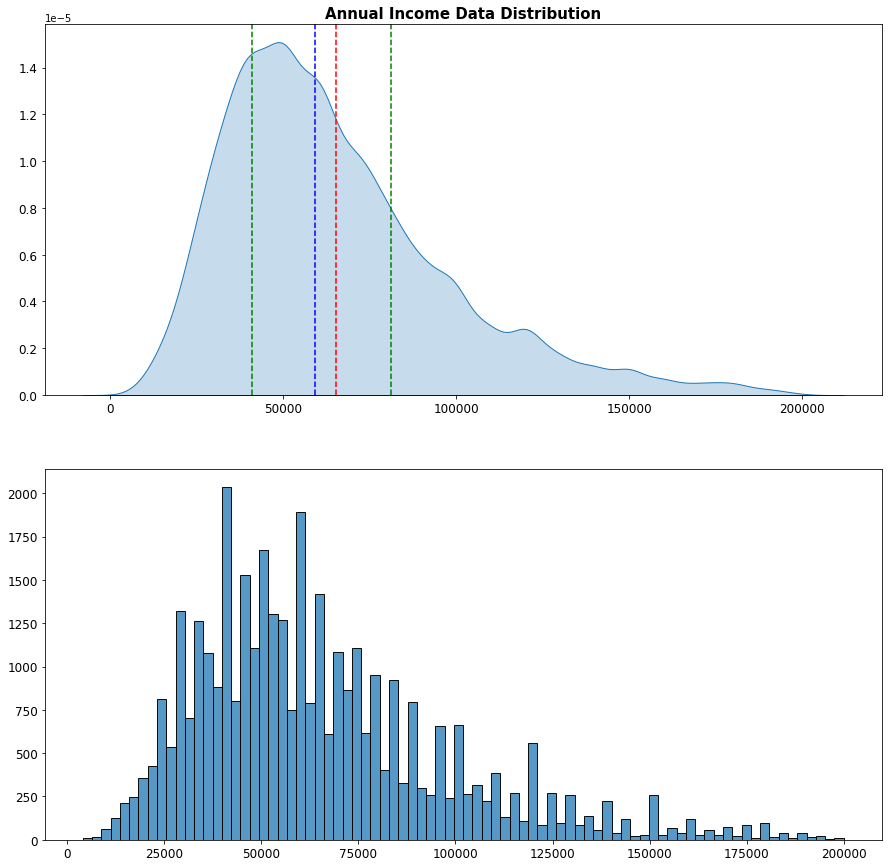

In [44]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.kdeplot(data = loan_df, x ='annual_inc', fill = bool).set(xlabel = None, ylabel = None)
plt.axvline(x=loan_df.annual_inc.mean(), color='red', linestyle = 'dashed')
plt.axvline(x=loan_df.annual_inc.median(), color='blue', linestyle = 'dashed')
plt.axvline(x=loan_df.annual_inc.quantile(0.25), color='green', linestyle = 'dashed')
plt.axvline(x=loan_df.annual_inc.quantile(0.75), color='green', linestyle = 'dashed')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Annual Income Data Distribution", fontsize = 15, fontweight = 'bold')

plt.subplot(2,1,2)
sns.histplot(data=loan_df, x="annual_inc").set(xlabel = None, ylabel = None)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Verification Status

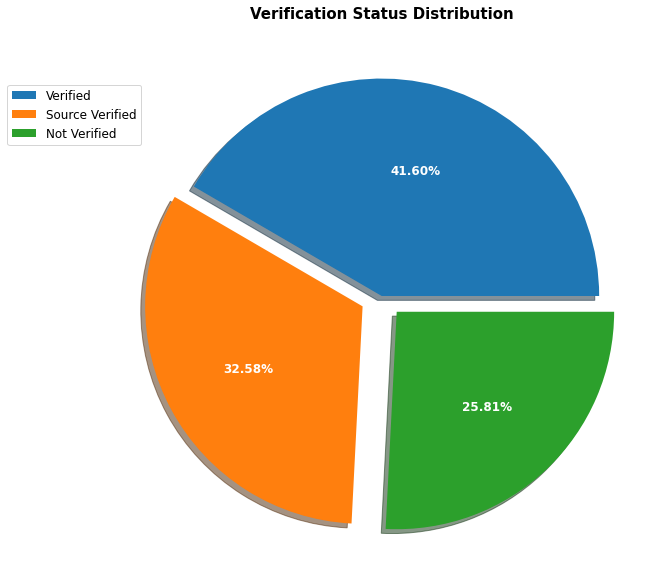

In [46]:
plt.figure(figsize=(18,10))

size = loan['verification_status'].value_counts().tolist()
labels = loan['verification_status'].unique().tolist()
explode = [0, 0.1, 0.1]
plt.pie(size, explode = explode, shadow = True, autopct = '%.2f%%',
       textprops={'color': 'w', 'fontsize' : 12, 'fontweight' : 'bold'})
plt.title('Verification Status Distribution', fontsize = 15, fontweight = 'bold')
plt.legend(labels, bbox_to_anchor=(-0.2,0.9), prop={'size': 12}, loc="upper left")
plt.axis('off')
plt.show()

### Loan Status

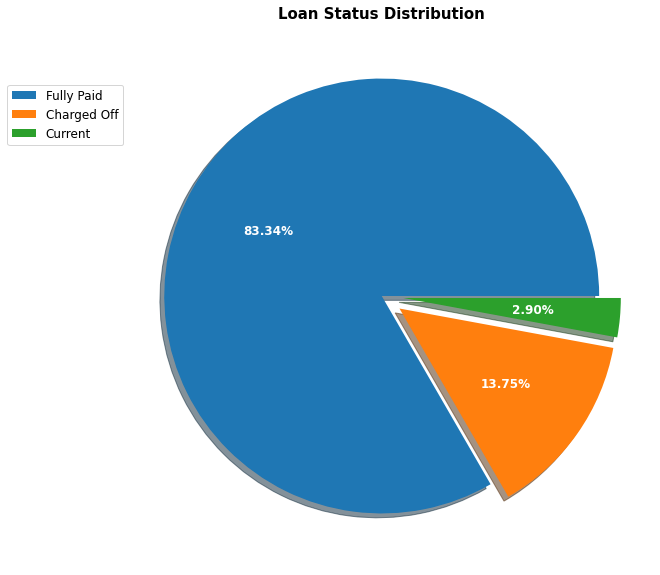

In [47]:
plt.figure(figsize=(18,10))

size = loan['loan_status'].value_counts().tolist()
labels = loan['loan_status'].unique().tolist()
explode = [0, 0.1, 0.1]
plt.pie(size, explode = explode, shadow = True, autopct = '%.2f%%',
       textprops={'color': 'w', 'fontsize' : 12, 'fontweight' : 'bold'})
plt.title('Loan Status Distribution', fontsize = 15, fontweight = 'bold')
plt.legend(labels, bbox_to_anchor=(-0.2,0.9), prop={'size': 12}, loc="upper left")
plt.axis('off')
plt.show()

### Purpose

In [59]:
count = loan.purpose.value_counts()
count

debt_consolidation    17910
other                  6911
credit_card            4897
home_improvement       2825
major_purchase         2084
small_business         1720
car                    1478
Name: purpose, dtype: int64

In [65]:
count.index.tolist()

['debt_consolidation',
 'other',
 'credit_card',
 'home_improvement',
 'major_purchase',
 'small_business',
 'car']

In [74]:
top7 = count[:7].index

In [75]:
loan.purpose = loan.purpose.where(loan.purpose.isin(top7), 'other')

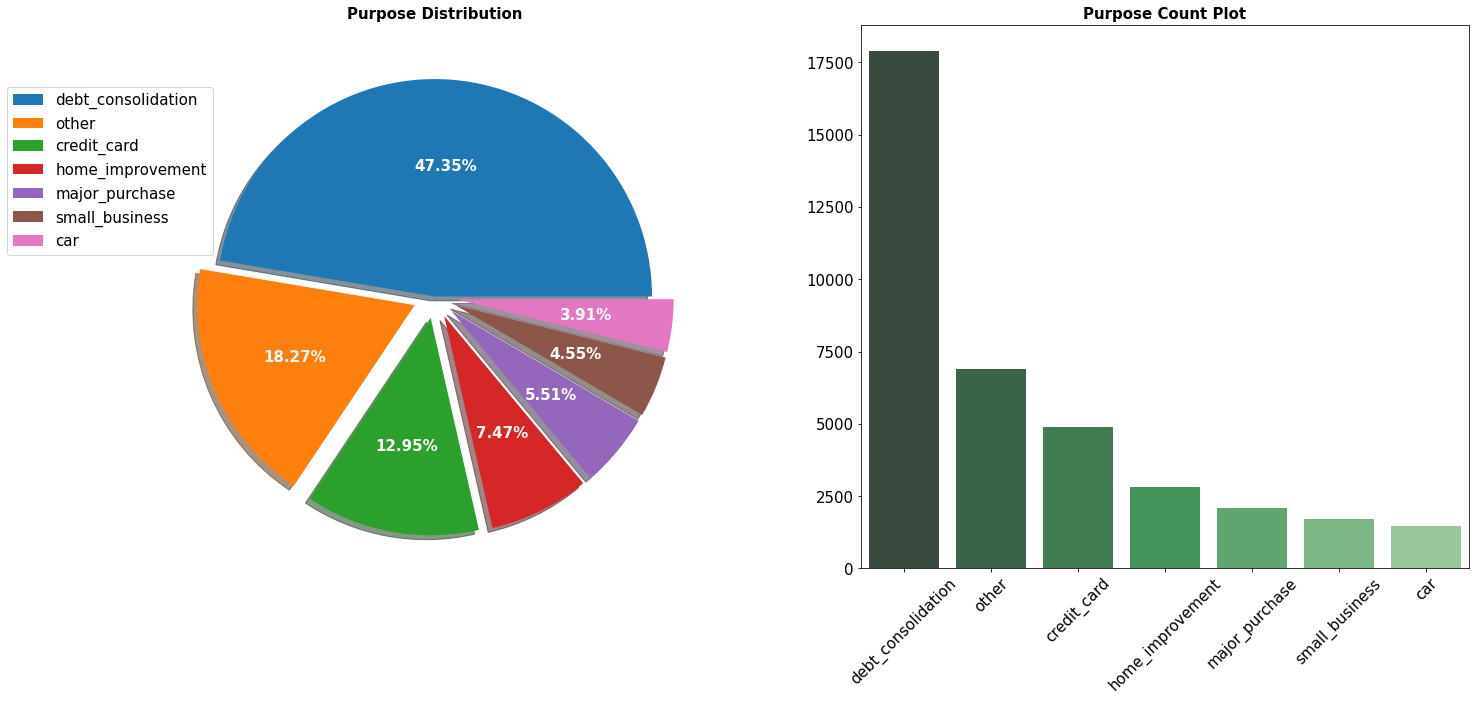

In [162]:
plt.figure(figsize=(24,10))

plt.subplot(1,2,1)
size = loan['purpose'].value_counts().tolist()
labels =loan.purpose.value_counts().index.tolist()
explode = [0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
plt.pie(size, explode = explode, shadow = True, autopct = '%.2f%%',
       textprops={'color': 'w', 'fontsize' : 15, 'fontweight' : 'bold'})
plt.title('Purpose Distribution', fontsize = 15, fontweight = 'bold')
plt.legend(labels, bbox_to_anchor=(-0.3,0.9), prop={'size': 15}, loc="upper left")
plt.axis('off')

plt.subplot(1,2,2)
palette = sns.color_palette("Greens_d", n_colors=7)
palette.reverse()
sns.countplot(x = 'purpose', data = loan, palette = palette, 
              order = loan.purpose.value_counts().index).set(xlabel = None, ylabel = None)
plt.title('Purpose Count Plot', fontweight="bold", fontsize = 15)
plt.xticks(fontsize = 15, rotation = 45)
plt.yticks(fontsize = 15)
plt.show()

### Address State

In [89]:
loan.addr_state.unique()

array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'PA', 'MN', 'NY', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN'], dtype=object)

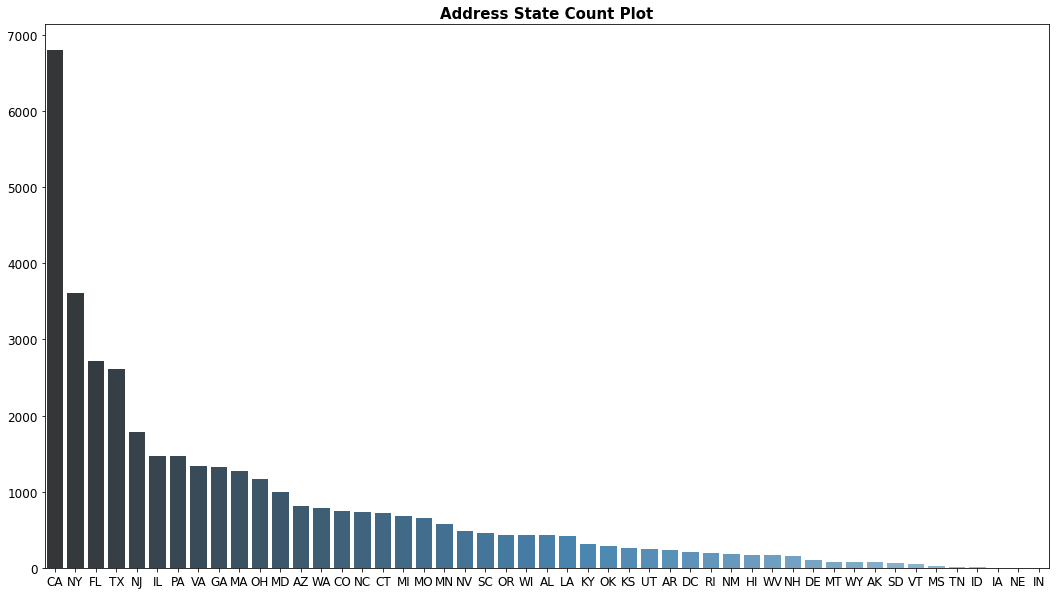

In [163]:
plt.figure(figsize=(18,10))
palette = sns.color_palette("Blues_d", n_colors=52)
palette.reverse()
sns.countplot(x = 'addr_state', data = loan, palette = palette, 
              order = loan.addr_state.value_counts().index).set(xlabel = None, ylabel = None)
plt.title('Address State Count Plot', fontweight="bold", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

I think if we can find a dataset with name of the states and population, we can pull it here and merge with the dataframe and create a column loan per state for each 100k population, so we can see if CA has the highest number of loans due to highest population or due to increase demand.

### DTI

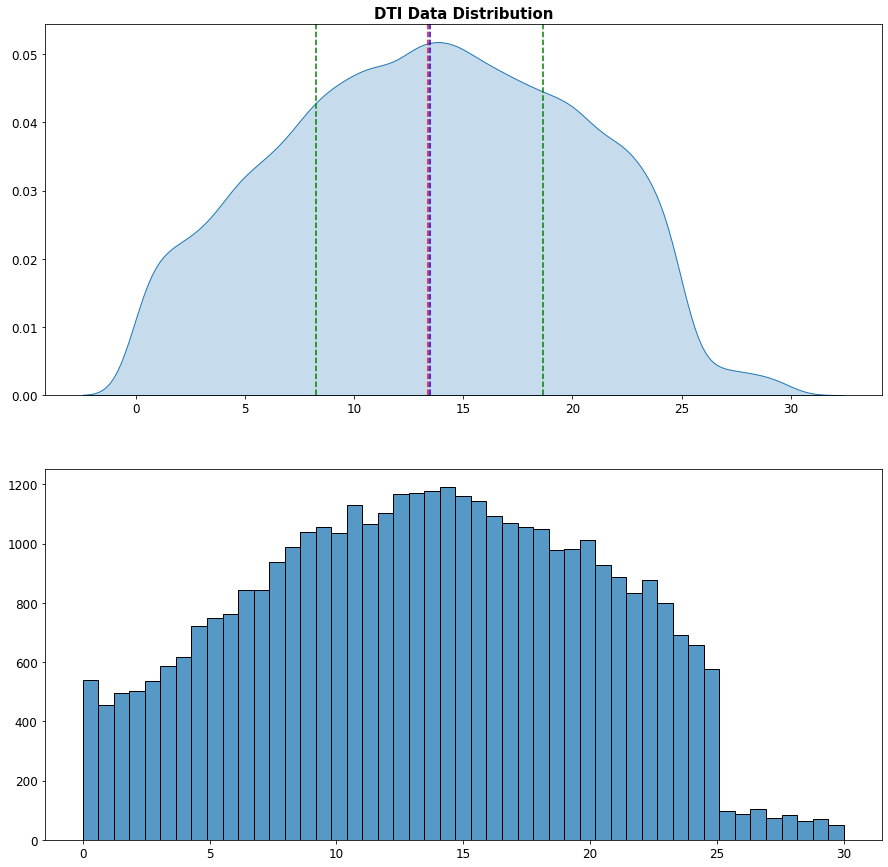

In [94]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.kdeplot(data = loan_df, x ='dti', fill = bool).set(xlabel = None, ylabel = None)
plt.axvline(x=loan.dti.mean(), color='red', linestyle = 'dashed')
plt.axvline(x=loan.dti.median(), color='blue', linestyle = 'dashed')
plt.axvline(x=loan.dti.quantile(0.25), color='green', linestyle = 'dashed')
plt.axvline(x=loan.dti.quantile(0.75), color='green', linestyle = 'dashed')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("DTI Data Distribution", fontsize = 15, fontweight = 'bold')

plt.subplot(2,1,2)
sns.histplot(data=loan_df, x="dti").set(xlabel = None, ylabel = None)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Delinquency in Last 2 year

In [125]:
loan.delinq_2yrs.value_counts()

0     33728
1      3149
>1      948
Name: delinq_2yrs, dtype: int64

In [103]:
count2 = loan.delinq_2yrs.value_counts()
count2.index.tolist()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11]

In [114]:
top = count2[:2].index

In [118]:
loan.delinq_2yrs = loan.delinq_2yrs.where(loan.delinq_2yrs.isin(top), '>1')

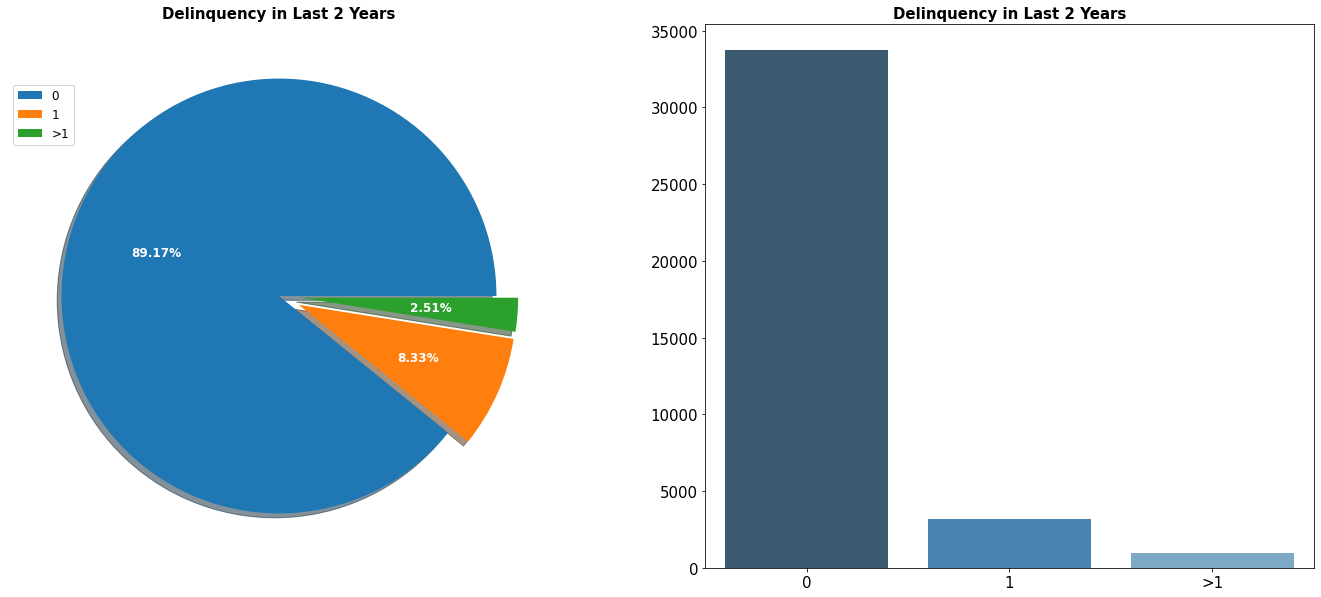

In [160]:
plt.figure(figsize=(24,10))

plt.subplot(1,2,1)
size = loan['delinq_2yrs'].value_counts().tolist()
labels = loan.delinq_2yrs.value_counts().index.tolist()
explode = [0, 0.1, 0.1]
plt.pie(size, explode = explode, shadow = True, autopct = '%.2f%%',
       textprops={'color': 'w', 'fontsize' : 12, 'fontweight' : 'bold'})
plt.title('Delinquency in Last 2 Years', fontsize = 15, fontweight = 'bold')
plt.legend(labels, bbox_to_anchor=(0,0.9), prop={'size': 12}, loc="upper left")
plt.axis('off')

plt.subplot(1,2,2)
palette = sns.color_palette("Blues_d", n_colors=3)
palette.reverse()
sns.countplot(x = 'delinq_2yrs', data = loan, palette = palette, 
              order = loan.delinq_2yrs.value_counts().index).set(xlabel = None, ylabel = None)
plt.title('Delinquency in Last 2 Years', fontweight="bold", fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

### Inquires in Last 6 Months

In [149]:
loan.inq_last_6mths.value_counts()

0    18398
1    10452
2     5542
3     2889
4      302
5      138
6       58
7       33
8       13
Name: inq_last_6mths, dtype: int64

In [150]:
count3 = loan.inq_last_6mths.value_counts()
count3.index.tolist()

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [151]:
top4 = count3[:4].index
top4

Int64Index([0, 1, 2, 3], dtype='int64')

In [155]:
loan.inq_last_6mths = loan.inq_last_6mths.where(loan.inq_last_6mths.isin(top4), '>3')

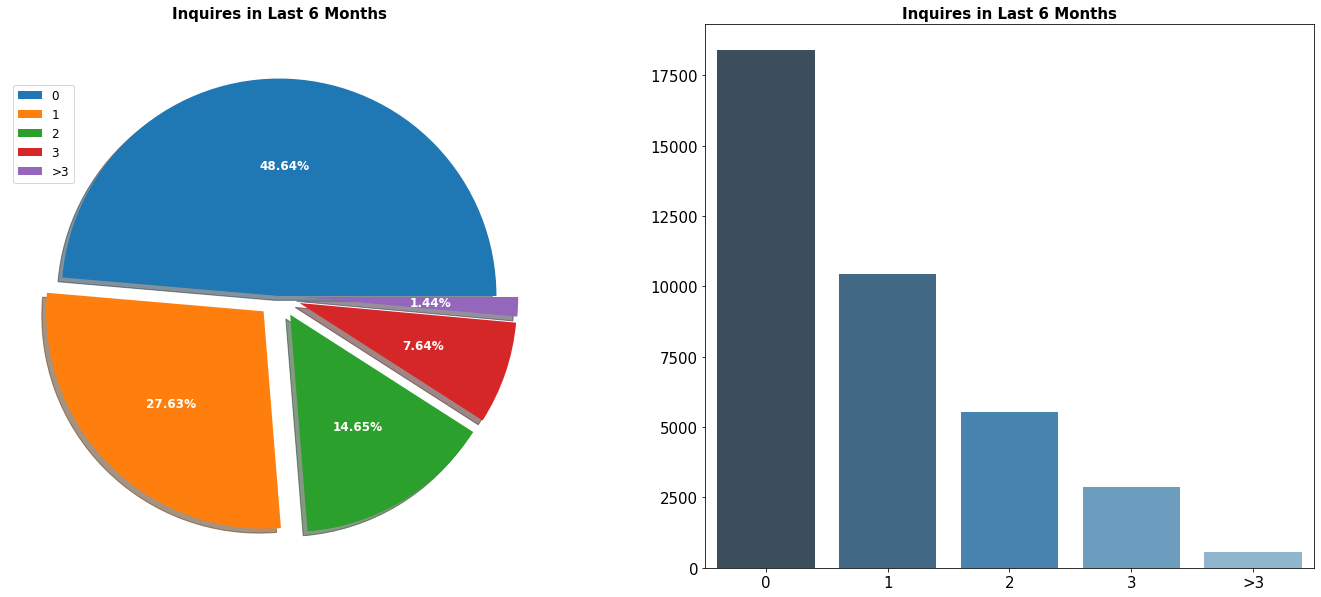

In [164]:
plt.figure(figsize=(24,10))

plt.subplot(1,2,1)
size = loan['inq_last_6mths'].value_counts().tolist()
labels = loan.inq_last_6mths.value_counts().index.tolist()
explode = [0, 0.1, 0.1, 0.1, 0.1]
plt.pie(size, explode = explode, shadow = True, autopct = '%.2f%%',
       textprops={'color': 'w', 'fontsize' : 12, 'fontweight' : 'bold'})
plt.title('Inquires in Last 6 Months', fontsize = 15, fontweight = 'bold')
plt.legend(labels, bbox_to_anchor=(0,0.9), prop={'size': 12}, loc="upper left")
plt.axis('off')

plt.subplot(1,2,2)
palette = sns.color_palette("Blues_d", n_colors=5)
palette.reverse()
sns.countplot(x = 'inq_last_6mths', data = loan, palette = palette, 
              order = loan.inq_last_6mths.value_counts().index).set(xlabel = None, ylabel = None)
plt.title('Inquires in Last 6 Months', fontweight="bold", fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()